In [ ]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

data = pd.read_csv("Twitter_sentiment.csv")
data

In [ ]:
def preprocess(text):
    if not isinstance(text, str): #check if string or not
        return ''
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text
data['clean_text'] = data['text'].apply(preprocess)
# data['clean_text'] = data['text'].apply(preprocess)
data.head()

,sentiment,text,clean_text
0,0,REad most of the book while visiting my brothe...,read most of the book while visiting my brothe...
1,0,"From Memphis, TN. comes The Reatards, fronted,...",from memphis tn comes the reatards fronted of ...
2,2,Either 1 or 5 Stars. Depends on how you look a...,either 1 or 5 stars depends on how you look at...
3,0,"Thia was a gift for my Husband, who loved the ...",thia was a gift for my husband who loved the b...
4,0,My four year old daughter loves everything Bar...,my four year old daughter loves everything bar...


In [ ]:
texts = data['clean_text'].values
labels = data['sentiment']

# texts = data['clean_text'].values
# labels = data['sentiment']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [ ]:
len(word_index)

52395

In [ ]:
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post')

In [ ]:
tokenized_texts = [text.split() for text in texts]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=200, window=5, min_count=1, workers=4)

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=200, weights=[embedding_matrix], input_length=200, trainable=False),

    LSTM(128, return_sequences=True, ),
    BatchNormalization(),

    Dropout(0.1),

    LSTM(64),
    BatchNormalization(),

    Dropout(0.1),

    Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │      10,479,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,479,200 (39.97 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,479,200 (39.97 MB)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

In [ ]:
X_train


array([[  16,   85,  795, ...,    0,    0,    0],
       [   5,  264,   19, ...,    0,    0,    0],
       [  16, 1762,  509, ...,    0,    0,    0],
       ...,
       [1561,  368,  140, ...,    0,    0,    0],
       [  16, 1133,  191, ...,    0,    0,    0],
       [  32,    1,  548, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_test

array([[  283,  6907,  2259, ...,     0,     0,     0],
       [  202,    10,    49, ...,     0,     0,     0],
       [   37,   523,   582, ...,     0,     0,     0],
       ...,
       [    2,    12,   175, ...,     0,     0,     0],
       [   96, 13511,    70, ...,     0,     0,     0],
       [ 1528,   185,  2192, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y_test

,sentiment
12704,0
14101,2
23601,1
15303,0
397,0
...,...
15461,0
20539,2
4356,0
8139,2


In [ ]:
y_train

,sentiment
19142,0
13713,2
16978,2
23575,1
9909,2
...,...
21575,1
5390,0
860,2
15795,2


In [ ]:
history = model.fit(X_train, y_train,epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.4565 - loss: 1.0231 - val_accuracy: 0.5937 - val_loss: 0.7881
Epoch 2/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7252 - loss: 0.6371 - val_accuracy: 0.6808 - val_loss: 0.8552
Epoch 3/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8007 - loss: 0.4928 - val_accuracy: 0.6869 - val_loss: 0.8497
Epoch 4/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8208 - loss: 0.4434 - val_accuracy: 0.7610 - val_loss: 0.5641
Epoch 5/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8367 - loss: 0.4054 - val_accuracy: 0.8044 - val_loss: 0.4899


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8007 - loss: 0.4919


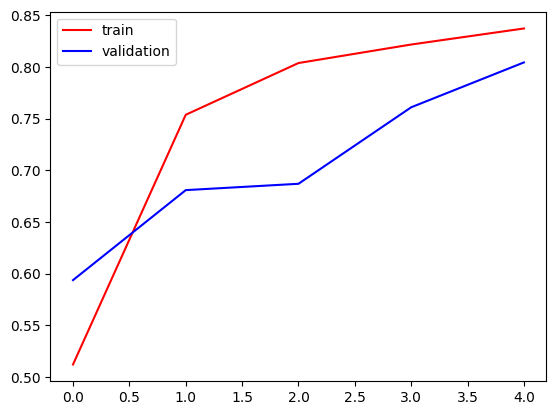

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


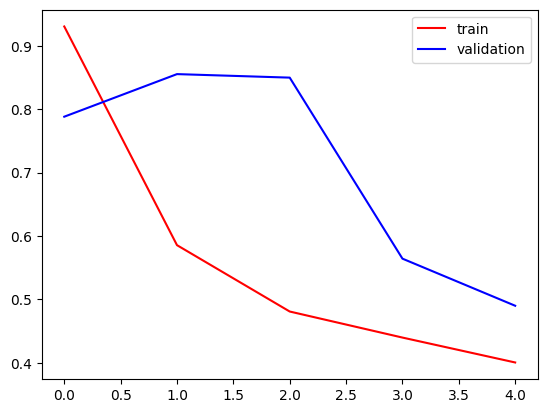

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
model.save("sentiment_model.h5")
model.save("sentiment_model.keras")

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)


In [ ]:
def predict_sentiment(text, model, tokenizer, maxlen=200,):

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction)


    return predicted_label


In [ ]:
new_text = input("Your text here")
sentiment = predict_sentiment(new_text, model
                              , tokenizer)

print(f"Predicted Sentiment: {sentiment}")


Your text hereok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Sentiment: 0
